# DSCI510 Fall 2020 Final Project Submission

1.	**Your name**:

    Pan Chuen Benjamin Chan

2.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
    We are analyzing all 16 teams in the 2019 men's Volleyball Nations League(VNL). For the part of finding the relationship between winning and public holidays, the public holidays API dataset has no public holidays records for Iran. Therefore, we could only analyze 15 teams for that part.

3.	**Any libraries that need to be installed to run your code**
    
    
    matplotlib.pyplot, 
    numpy, 
    statsmodels.api, 
    date and datetime from datetime, 
    pandas, 
    math (sin, cos, sqrt, atan2, radians only)


4.	**Anything else you feel is relevant to the grading of your project**
    Just writting down the backgroud of my project here to brief the grader.
    
    I play volleyball myself and I am very interested in exploring the Volleyball Nations League’s(VNL) data. I would like to see if I could discover some fascinating or funny random patterns and relationships between variables.
    
    There are several main tables for the entire study:
    
    
    1. team_roster: It contains the player's information for The 2019 men's VNL for all 16 participating countries/teams. For each team, there is data about every player’s profile, such as name, height, weight, position, spike height, etc.
    
    2. best_attackers: It contains all player's shirt number, attack statistics, such as total attempts, faults and spike(points gained).
    
    3. men_result_with_city: It contains the men's match schedule for all teams. There are 120 matches in total, each with data about the match result, date, scores, match location(city), etc.
    
    4. public_holidays: It contains data about public holidays for more than 90 countries. Attributes include date, country, name of the holiday, etc.
    
    5. geocode: It contains data about the match locations(in city) and their longitude, latitude.



5.	**What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**
    
    There are a few objectives of the study.
    
    First, we aim to analyze if there are relationships between attack scoring and different variables, such as height, weight, age, jump height, number of olympic games played or even shirt number.
    
    Second, we would like to see if public holidays have an effect on match performance. Does a team perform better or worse during/near public holidays?
    
    Third, teams travel around the world multiple times during the whole league. We would try to explore whether traveling distance affects match performance.

6.	**What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**
    
    For analyzing the relationship between attack scoring and different variables, it is found that only the spiking jump height is related to scoring. The higher the player jumps, the better the scoring chance. Although it is intuitive that one scores better with higher approach jumps, it is unexpected that other factors like experience(indicated by the number of world championships/olympic games), height, weight, standing jump and age are not related to attack scoring. (It is, of course, expected that shirt number is not related though. Adding shirt number as a variable was just for fun, haha) 
    
    For finding the relationship between public holidays and match performance, It was originally assumed that teams might perform worse during or near public holidays of their own country. However, the visualization shows that there does not seem to have a relationship between public holidays and match performance.
    
    For finding the relationship between travel distance and match performance, It was originally assumed that teams might perform worse if they traveled a long way to the match location. After the study, we could observe from the visualization that teams win more at low travel distance than at high travel distance. This might indicate that the higher the travel distance, the worse the match performance. However, the trend is not very obvious. It might require further studies to confirm the relationship.

7.	**What difficulties did you have in completing the project?**
    
    I spent the most time in hidden errors, data integration and data conversion. 
    
    Sometimes, keys from differernt tables were not in the same format. If error occurs during table merging, it's okay, I may deal with it. However, when 2 tables with different date format(American vs British) merged together, the program could not detect errors. I had to check myself whether there was any hidden errors. 
    
    Sometimes I had to perform complicated math calculations to convert data for analysis.

8.	**What skills did you wish you had while you were doing the project?**
    
    I wish I had more skills in using pandas. During the project, I always had to google about pandas functions to play around with dataframes. I might be able to work faster if I was more familiar with the library.
    
    I also wish I had more knowledge in the analysis libraries, such as those that perform regression and machine learning.

9.	**What would you do “next” to expand or augment the project?**
    
    For the first part of my project, I tried to use regression. If I have the chance to expand or augment the project, I would learn more about regression in python and perform a more formal and detailed analysis for a more complete and accurate analysis.
    
    Also, I would like to perform more analysis after visualizations of the second and third part of my project. For example, if I learn more about machine learning in python, I may try to implement it on the data.

In [2]:
%matplotlib inline
from src import CHAN_PAN_CHUEN_BENJAMIN_proj2 as pj2
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from datetime import date
from datetime import datetime
import pandas as pd
from math import sin, cos, sqrt, atan2, radians

## 1. Find the relationship between scoring and different variables (regression)

### Data pre-processing:

Import relevant datasets
1. player's personal profile
2. player's attack statistics

In [5]:
#1 import team_roster.csv which contains all player's personal profile like birthdate and height
team_roster_df = pj2.csv_to_df('data/team_roster')
#team_roster_df

#2 import best_attackers.csv which contains player's attack statistics like number of succesful spikes and faults
best_attackers_df = pj2.csv_to_df('data/best_attackers')
#best_attackers_df

Data cleaning

In [6]:
#for team_roster_df, it is found that the captain's name of each team contaons a 'c' at the end.
#We need to remove the 'c' at the end for accurate table merging later
def data_cleaning_remove_end_char(df, char):
    for index in df['Name'].index:
        name = df.Name.values[index]
        if name.endswith(char):
            df.at[index, 'Name'] = name[:-2]
    return df

team_roster_df = data_cleaning_remove_end_char(team_roster_df, ' c')
#team_roster_df.head(20)

Data integration: Merge the two tables

In [7]:
#merge the two tables(team_roster_df and best_attackers_df)
best_attackers_team_roster_df = pd.merge(best_attackers_df, team_roster_df, left_on=['Name'], right_on=['Name'])
best_attackers_team_roster_df

,Rank,ShirtNumber,Name,Spikes,Faults,Shots,Total attempts,Success %,Country_x,N°,...,Height,Weight,Spike,Block,World championships,Olympic games,Other,Total,Club,Country_y
0,1,12,Bruno Lima,177,50,98,325,54.46,arg-argentina,12,...,198,87,345,320,0,0,0,0,TV Buhl Volleybal,arg-argentina
1,2,7,Facundo Conte,138,49,101,288,47.92,arg-argentina,7,...,197,88,354,334,18,6,111,135,TAHUBATE,arg-argentina
2,3,2,Federico Pereyra,79,27,51,157,NaN,arg-argentina,2,...,200,99,335,325,9,6,127,142,Nolio Maaseik Club,arg-argentina
3,4,3,Jan Martinez Franchi,38,12,35,85,NaN,arg-argentina,3,...,190,85,333,316,0,0,0,0,BOLIVAR,arg-argentina
4,5,4,Maximiliano Cavanna,2,0,1,3,NaN,arg-argentina,4,...,188,81,333,312,0,0,28,28,UPCN San Juan Volley,arg-argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,16,17,Thomas Jaeschke,26,10,18,54,NaN,usa-usa,17,...,198,84,348,330,0,8,65,73,Bluvolley Verona,usa-usa
247,17,19,Taylor Averill,18,4,7,29,NaN,usa-usa,19,...,201,94,370,330,12,0,43,55,Chaumont Volley-Ball 52,usa-usa
248,18,20,David Smith,68,11,41,120,NaN,usa-usa,20,...,201,86,348,314,27,14,163,204,Asseco Resovia Rzeszów,usa-usa
249,19,25,Kyle Russell,27,14,25,66,NaN,usa-usa,25,...,206,95,358,343,0,0,11,11,SCC Berlin,usa-usa


Data conversion

In [8]:
#convert column birthdate into age for analysis later
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


def bday_list_to_age(df, column):
    li = list()
    for Birthdate in df[column]:
        datetime_obj = datetime.strptime(Birthdate, '%d/%m/%Y').date()
        age = calculate_age(datetime_obj)
        li.append(age)
        #print(type(datetime_obj))
    return li

best_attackers_team_roster_df['Age'] = bday_list_to_age(best_attackers_team_roster_df, 'Birthdate')
best_attackers_team_roster_df

,Rank,ShirtNumber,Name,Spikes,Faults,Shots,Total attempts,Success %,Country_x,N°,...,Weight,Spike,Block,World championships,Olympic games,Other,Total,Club,Country_y,Age
0,1,12,Bruno Lima,177,50,98,325,54.46,arg-argentina,12,...,87,345,320,0,0,0,0,TV Buhl Volleybal,arg-argentina,24
1,2,7,Facundo Conte,138,49,101,288,47.92,arg-argentina,7,...,88,354,334,18,6,111,135,TAHUBATE,arg-argentina,31
2,3,2,Federico Pereyra,79,27,51,157,NaN,arg-argentina,2,...,99,335,325,9,6,127,142,Nolio Maaseik Club,arg-argentina,32
3,4,3,Jan Martinez Franchi,38,12,35,85,NaN,arg-argentina,3,...,85,333,316,0,0,0,0,BOLIVAR,arg-argentina,22
4,5,4,Maximiliano Cavanna,2,0,1,3,NaN,arg-argentina,4,...,81,333,312,0,0,28,28,UPCN San Juan Volley,arg-argentina,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,16,17,Thomas Jaeschke,26,10,18,54,NaN,usa-usa,17,...,84,348,330,0,8,65,73,Bluvolley Verona,usa-usa,27
247,17,19,Taylor Averill,18,4,7,29,NaN,usa-usa,19,...,94,370,330,12,0,43,55,Chaumont Volley-Ball 52,usa-usa,28
248,18,20,David Smith,68,11,41,120,NaN,usa-usa,20,...,86,348,314,27,14,163,204,Asseco Resovia Rzeszów,usa-usa,35
249,19,25,Kyle Russell,27,14,25,66,NaN,usa-usa,25,...,95,358,343,0,0,11,11,SCC Berlin,usa-usa,27


### Data analysis(regression)

variables selection

In [9]:
#Now we have a table which each row represents a player with his personal info and attack statistics
#choose indepemndent and dependent variables for regression

#indepemndent variables
best_attackers_team_roster_df_x = best_attackers_team_roster_df[['ShirtNumber', 'Age', 'Height', 'Weight', 'Spike', 'Block', 'World championships', 'Olympic games']]
#depemndent variable(column:Spikes represents number of points earned by spiking)
best_attackers_team_roster_df_y = best_attackers_team_roster_df[['Spikes']]

In [10]:
#turn them into numpy arrays to fit the input format for the regression model
best_attackers_team_roster_df_x_arr = best_attackers_team_roster_df_x.to_numpy()
best_attackers_team_roster_df_y_arr = best_attackers_team_roster_df_y.to_numpy()
#print(best_attackers_team_roster_df_x_arr)
#print(best_attackers_team_roster_df_y_arr)

In [11]:
#add_constant if you want the library statsmodels to calculate the intercept 𝑏₀
best_attackers_team_roster_df_x_arr = sm.add_constant(best_attackers_team_roster_df_x_arr)
best_attackers_team_roster_df_x_arr

array([[  1.,  12.,  24., ..., 320.,   0.,   0.],
       [  1.,   7.,  31., ..., 334.,  18.,   6.],
       [  1.,   2.,  32., ..., 325.,   9.,   6.],
       ...,
       [  1.,  20.,  35., ..., 314.,  27.,  14.],
       [  1.,  25.,  27., ..., 343.,   0.,   0.],
       [  1.,  30.,  23., ..., 345.,   0.,   0.]])

Create a model and fit it

In [12]:
best_attackers_team_roster_model = sm.OLS(best_attackers_team_roster_df_y_arr, best_attackers_team_roster_df_x_arr)
best_attackers_team_roster_results = best_attackers_team_roster_model.fit()

Results

In [13]:
print(best_attackers_team_roster_results.summary(xname=['Constant', 'ShirtNumber', 'Age', 'Height', 'Weight', 'Spike', 'Block', 'World championships', 'Olympic games']))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     2.833
Date:                Tue, 08 Dec 2020   Prob (F-statistic):            0.00505
Time:                        21:11:05   Log-Likelihood:                -1307.1
No. Observations:                 251   AIC:                             2632.
Df Residuals:                     242   BIC:                             2664.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Constant             -262.1769    

Based on the summary, according to the p-values column(P>|t|) , all p-values seems to be > 0.05 except for variable Spike(spiking jump height), which p-value is 0.002 < 0.01. Therefore, it seems that spiking jump height has a relationship with scoring in attack. The regression coefficient for Spike is 1.1741, which is positive. Thus, it seems that the higher spike, the higher chance of scoring in attack.

However, other factors like shirt number, age, height, weight, blocking height, no. of world championships and no. of Olympic games seem to have no relationship with scoring in attack.

In [14]:
#just recording the numbers here for possible future analysis
print('coefficient of determination:', best_attackers_team_roster_results.rsquared)
print('adjusted coefficient of determination:', best_attackers_team_roster_results.rsquared_adj)
print('regression coefficients:', best_attackers_team_roster_results.params)

coefficient of determination: 0.08562167422495859
adjusted coefficient of determination: 0.05539429155470943
regression coefficients: [-2.62176856e+02 -4.06171458e-01 -5.86767948e-01 -3.26041383e-01
  1.48150823e-01  1.17411592e+00 -5.92340047e-02 -3.48839243e-01
  3.34526204e-01]


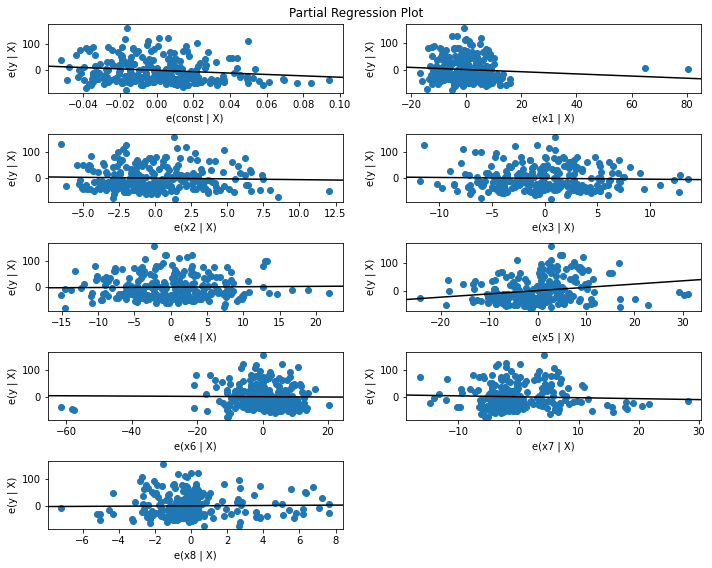

In [15]:
#visualization: partial regression plot

fig = plt.figure(figsize=(10, 8))
#best_attackers_team_roster_fig = 
sm.graphics.plot_partregress_grid(best_attackers_team_roster_results, fig=fig)
plt.show()
#x5 is Spike

## 2. Find the relationship between public holidays and match performance

### Data pre-processing:

Import relevant datasets

1. all men's team match results
2. country names of the public holiday dataset(for merging dataset 1 and 3)
3. the whole public holiday dataset

In [16]:
#1 men_result_with_city.csv includes all men's team match results, such as date, match points, countries
men_result_with_city_df = pj2.csv_to_df('data/men_result_with_city', header=2)
#2 publicHolidays_availableCountries.csv contains country code and names for table merging
publicHolidays_availableCountries_df = pj2.csv_to_df('data/publicHolidays_availableCountries')
#3 public_holidays.csv contains public holidays info for all countries, such as date and holiday name
public_holidays_df = pj2.csv_to_df('data/public_holidays')
#men_result_with_city_df
#publicHolidays_availableCountries_df
#public_holidays_df.head(10)

Add 2 country columns to show the 2 participating teams for each match on men_result_with_city_df

In [17]:
def add_country_columns(df, df_with_country):
    home_list = list()
    away_list = list()
    for result_country in df[('Teams', 'Teams')]:
        home = result_country[:3].lower()
        away = result_country[-3::].lower()
        for country in df_with_country['Country'].unique():
            if home == country[:3]:
                home_list.append(country.split("-",1)[1])
            if away == country[:3]:
                away_list.append(country.split("-",1)[1])
    return home_list, away_list

home_list, away_list = add_country_columns(men_result_with_city_df, team_roster_df)
#print(home_list)
#print(away_list)

In [18]:
men_result_with_city_df['home_team'] = home_list
men_result_with_city_df['away_team'] = away_list

Data cleaning

In [19]:
#it is found that the country name for The United States on publicHolidays_availableCountries_df 
#is different from that on men_result_with_city_df
#Therefore, we have to synchronize the country name for table merging later

#change united states to usa on publicHolidays_availableCountries_df
publicHolidays_availableCountries_df.loc[publicHolidays_availableCountries_df['value'] == 'United States', 'value'] = 'usa'
publicHolidays_availableCountries_df['value'] = publicHolidays_availableCountries_df['value'].str.lower()
publicHolidays_availableCountries_df.tail(10)

,key,value
91,TN,tunisia
92,TR,turkey
93,UA,ukraine
94,US,usa
95,UY,uruguay
96,VA,vatican city
97,VE,venezuela
98,VN,vietnam
99,ZA,south africa
100,ZW,zimbabwe


Merge country codes into men_result_with_city_df for table merging later

In [20]:
men_result_with_city_df = pd.merge(men_result_with_city_df, publicHolidays_availableCountries_df, how='left', left_on=[('home_team', '')], right_on=['value'])
men_result_with_city_df

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(Number, Number)","(Date, Date)","(Teams, Teams)","(Sets, Sets)","(Result per set (points), 1)","(Result per set (points).1, 2)","(Result per set (points).2, 3)","(Result per set (points).3, 4)","(Result per set (points).4, 5)","(Points, Points)","(Time, Time)","(Audience, Audience)","(MatchNumber, Unnamed: 12_level_1)","(City, Unnamed: 13_level_1)","(home_team, )","(away_team, )",key,value
0,1,31/05/2019,IRI - ITA,3 - 1,20 - 25,25 - 23,25 - 23,25 - 23,-,95 - 94,02:17,2040,1,Jiangmen,iran,italy,NaN,NaN
1,7,31/05/2019,SRB - JPN,1 - 3,17 - 25,12 - 25,26 - 24,17 - 25,-,72 - 99,01:51,750,7,Novi Sad,serbia,japan,RS,serbia
2,5,31/05/2019,USA - BRA,0 - 3,22 - 25,22 - 25,23 - 25,-,-,67 - 75,01:33,5672,5,Katowice,usa,brazil,US,usa
3,3,31/05/2019,CAN - BUL,1 - 3,20 - 25,24 - 26,25 - 19,17 - 25,-,86 - 95,01:44,1600,3,Mendoza,canada,bulgaria,CA,canada
4,2,31/05/2019,CHN - GER,2 - 3,21 - 25,21 - 25,25 - 19,25 - 19,11 - 15,103 - 103,02:14,3130,2,Jiangmen,china,germany,CN,china
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,30/06/2019,CAN - FRA,0 - 3,22 - 25,26 - 28,23 - 25,-,-,71 - 78,01:30,4090,115,Brasilia,canada,france,CA,canada
116,117,30/06/2019,IRI - USA,0 - 3,25 - 27,21 - 25,20 - 25,-,-,66 - 77,01:22,980,117,Plovdiv,iran,usa,NaN,NaN
117,120,30/06/2019,POL - POR,3 - 0,25 - 18,25 - 21,25 - 20,-,-,75 - 59,01:18,1195,120,Leipzig,poland,portugal,PL,poland
118,116,30/06/2019,BRA - ITA,3 - 1,26 - 28,25 - 22,25 - 18,25 - 18,-,101 - 86,02:04,9446,116,Brasilia,brazil,italy,BR,brazil


In [21]:
men_result_with_city_df = pd.merge(men_result_with_city_df, publicHolidays_availableCountries_df, how='left', left_on=[('away_team', '')], right_on=['value'])
men_result_with_city_df

,"(Number, Number)","(Date, Date)","(Teams, Teams)","(Sets, Sets)","(Result per set (points), 1)","(Result per set (points).1, 2)","(Result per set (points).2, 3)","(Result per set (points).3, 4)","(Result per set (points).4, 5)","(Points, Points)","(Time, Time)","(Audience, Audience)","(MatchNumber, Unnamed: 12_level_1)","(City, Unnamed: 13_level_1)","(home_team, )","(away_team, )",key_x,value_x,key_y,value_y
0,1,31/05/2019,IRI - ITA,3 - 1,20 - 25,25 - 23,25 - 23,25 - 23,-,95 - 94,02:17,2040,1,Jiangmen,iran,italy,NaN,NaN,IT,italy
1,7,31/05/2019,SRB - JPN,1 - 3,17 - 25,12 - 25,26 - 24,17 - 25,-,72 - 99,01:51,750,7,Novi Sad,serbia,japan,RS,serbia,JP,japan
2,5,31/05/2019,USA - BRA,0 - 3,22 - 25,22 - 25,23 - 25,-,-,67 - 75,01:33,5672,5,Katowice,usa,brazil,US,usa,BR,brazil
3,3,31/05/2019,CAN - BUL,1 - 3,20 - 25,24 - 26,25 - 19,17 - 25,-,86 - 95,01:44,1600,3,Mendoza,canada,bulgaria,CA,canada,BG,bulgaria
4,2,31/05/2019,CHN - GER,2 - 3,21 - 25,21 - 25,25 - 19,25 - 19,11 - 15,103 - 103,02:14,3130,2,Jiangmen,china,germany,CN,china,DE,germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,30/06/2019,CAN - FRA,0 - 3,22 - 25,26 - 28,23 - 25,-,-,71 - 78,01:30,4090,115,Brasilia,canada,france,CA,canada,FR,france
116,117,30/06/2019,IRI - USA,0 - 3,25 - 27,21 - 25,20 - 25,-,-,66 - 77,01:22,980,117,Plovdiv,iran,usa,NaN,NaN,US,usa
117,120,30/06/2019,POL - POR,3 - 0,25 - 18,25 - 21,25 - 20,-,-,75 - 59,01:18,1195,120,Leipzig,poland,portugal,PL,poland,PT,portugal
118,116,30/06/2019,BRA - ITA,3 - 1,26 - 28,25 - 22,25 - 18,25 - 18,-,101 - 86,02:04,9446,116,Brasilia,brazil,italy,BR,brazil,IT,italy


In [22]:
#rename column names key_x, key_y into more meaningful names
men_result_with_city_df = men_result_with_city_df.rename(columns={"key_x": "home_team_code", "key_y": "away_team_code"})

In [23]:
#make sure the date column is in the same datetime format for future analysis with the date in public_holidays_df
men_result_with_city_df[('Date', 'Date')] = pd.to_datetime(men_result_with_city_df[('Date', 'Date')], dayfirst=True)

In [24]:
#make sure the date column is in the same datetime format for future analysis with the date in men_result_with_city_df
public_holidays_df['date'] = pd.to_datetime(public_holidays_df['date'])

#we need 2 columns for analysis only
#extract the only 2 columns we need
public_holidays_df = public_holidays_df[['date', 'countryCode']]
#only unique values are needed
#select unique values
public_holidays_df = public_holidays_df.drop_duplicates()
public_holidays_df

,date,countryCode
0,2019-01-01,AD
1,2019-03-14,AD
3,2019-12-25,AD
4,2019-01-01,AL
5,2019-01-02,AL
...,...,...
1360,2019-08-12,ZW
1361,2019-08-13,ZW
1362,2019-12-22,ZW
1363,2019-12-25,ZW


Data integration: add two columns from public_holidays_df to the main table men_result_with_city_df for analysis

In [25]:
#find out the country's cloest holiday to the match date for every country
def closest_holiday(code, df, holiday_df):
    li = list()
    for result_index, result_row in df.iterrows():
        #for public_holidays_index, public_holidays_row in public_holidays_df.iterrows():
        holidays = holiday_df[holiday_df['countryCode'] == result_row[code]]
        holidays = abs(holidays['date'] - result_row[('Date', 'Date')])
        holidays = holidays.to_list()
        if holidays == []:
            li.append(np.NaN)
        else:
            holidays = min(holidays)
            li.append(holidays)
    return li

closest_holiday_home_list = closest_holiday('home_team_code', men_result_with_city_df, public_holidays_df)
closest_holiday_away_list = closest_holiday('away_team_code', men_result_with_city_df, public_holidays_df)

In [26]:
men_result_with_city_df['home_team_closest_holiday'] = closest_holiday_home_list
men_result_with_city_df['away_team_closest_holiday'] = closest_holiday_away_list
men_result_with_city_df

,"(Number, Number)","(Date, Date)","(Teams, Teams)","(Sets, Sets)","(Result per set (points), 1)","(Result per set (points).1, 2)","(Result per set (points).2, 3)","(Result per set (points).3, 4)","(Result per set (points).4, 5)","(Points, Points)",...,"(MatchNumber, Unnamed: 12_level_1)","(City, Unnamed: 13_level_1)","(home_team, )","(away_team, )",home_team_code,value_x,away_team_code,value_y,home_team_closest_holiday,away_team_closest_holiday
0,1,2019-05-31,IRI - ITA,3 - 1,20 - 25,25 - 23,25 - 23,25 - 23,-,95 - 94,...,1,Jiangmen,iran,italy,NaN,NaN,IT,italy,NaT,2 days
1,7,2019-05-31,SRB - JPN,1 - 3,17 - 25,12 - 25,26 - 24,17 - 25,-,72 - 99,...,7,Novi Sad,serbia,japan,RS,serbia,JP,japan,29 days,25 days
2,5,2019-05-31,USA - BRA,0 - 3,22 - 25,22 - 25,23 - 25,-,-,67 - 75,...,5,Katowice,usa,brazil,US,usa,BR,brazil,4 days,20 days
3,3,2019-05-31,CAN - BUL,1 - 3,20 - 25,24 - 26,25 - 19,17 - 25,-,86 - 95,...,3,Mendoza,canada,bulgaria,CA,canada,BG,bulgaria,11 days,7 days
4,2,2019-05-31,CHN - GER,2 - 3,21 - 25,21 - 25,25 - 19,25 - 19,11 - 15,103 - 103,...,2,Jiangmen,china,germany,CN,china,DE,germany,7 days,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,2019-06-30,CAN - FRA,0 - 3,22 - 25,26 - 28,23 - 25,-,-,71 - 78,...,115,Brasilia,canada,france,CA,canada,FR,france,1 days,14 days
116,117,2019-06-30,IRI - USA,0 - 3,25 - 27,21 - 25,20 - 25,-,-,66 - 77,...,117,Plovdiv,iran,usa,NaN,NaN,US,usa,NaT,4 days
117,120,2019-06-30,POL - POR,3 - 0,25 - 18,25 - 21,25 - 20,-,-,75 - 59,...,120,Leipzig,poland,portugal,PL,poland,PT,portugal,10 days,1 days
118,116,2019-06-30,BRA - ITA,3 - 1,26 - 28,25 - 22,25 - 18,25 - 18,-,101 - 86,...,116,Brasilia,brazil,italy,BR,brazil,IT,italy,10 days,28 days


In [27]:
#add columns sets_diff to indicate how many sets the home team won by. 
#eg, 2 means the home team won by sets 3 - 1
#eg, -1 means the home team lost by sets 2 - 3

#similarly, add columns sets_diff_reverse to indicate how many sets the away team won by. 
men_result_with_city_df['sets_diff'] = pd.to_numeric(men_result_with_city_df[('Sets', 'Sets')].astype(str).str[0]) - pd.to_numeric(men_result_with_city_df[('Sets', 'Sets')].astype(str).str[-1])
men_result_with_city_df['sets_diff_reverse'] = -men_result_with_city_df['sets_diff']
men_result_with_city_df

,"(Number, Number)","(Date, Date)","(Teams, Teams)","(Sets, Sets)","(Result per set (points), 1)","(Result per set (points).1, 2)","(Result per set (points).2, 3)","(Result per set (points).3, 4)","(Result per set (points).4, 5)","(Points, Points)",...,"(home_team, )","(away_team, )",home_team_code,value_x,away_team_code,value_y,home_team_closest_holiday,away_team_closest_holiday,sets_diff,sets_diff_reverse
0,1,2019-05-31,IRI - ITA,3 - 1,20 - 25,25 - 23,25 - 23,25 - 23,-,95 - 94,...,iran,italy,NaN,NaN,IT,italy,NaT,2 days,2,-2
1,7,2019-05-31,SRB - JPN,1 - 3,17 - 25,12 - 25,26 - 24,17 - 25,-,72 - 99,...,serbia,japan,RS,serbia,JP,japan,29 days,25 days,-2,2
2,5,2019-05-31,USA - BRA,0 - 3,22 - 25,22 - 25,23 - 25,-,-,67 - 75,...,usa,brazil,US,usa,BR,brazil,4 days,20 days,-3,3
3,3,2019-05-31,CAN - BUL,1 - 3,20 - 25,24 - 26,25 - 19,17 - 25,-,86 - 95,...,canada,bulgaria,CA,canada,BG,bulgaria,11 days,7 days,-2,2
4,2,2019-05-31,CHN - GER,2 - 3,21 - 25,21 - 25,25 - 19,25 - 19,11 - 15,103 - 103,...,china,germany,CN,china,DE,germany,7 days,1 days,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,2019-06-30,CAN - FRA,0 - 3,22 - 25,26 - 28,23 - 25,-,-,71 - 78,...,canada,france,CA,canada,FR,france,1 days,14 days,-3,3
116,117,2019-06-30,IRI - USA,0 - 3,25 - 27,21 - 25,20 - 25,-,-,66 - 77,...,iran,usa,NaN,NaN,US,usa,NaT,4 days,-3,3
117,120,2019-06-30,POL - POR,3 - 0,25 - 18,25 - 21,25 - 20,-,-,75 - 59,...,poland,portugal,PL,poland,PT,portugal,10 days,1 days,3,-3
118,116,2019-06-30,BRA - ITA,3 - 1,26 - 28,25 - 22,25 - 18,25 - 18,-,101 - 86,...,brazil,italy,BR,brazil,IT,italy,10 days,28 days,2,-2


In [28]:
#turn home_team_closest_holiday and away_team_closest_holiday from date format to numbers
#so it could be used for analysis more conveniently
men_result_with_city_df['home_team_closest_holiday'] = men_result_with_city_df['home_team_closest_holiday'].dt.days
men_result_with_city_df['away_team_closest_holiday'] = men_result_with_city_df['away_team_closest_holiday'].dt.days
men_result_with_city_df

,"(Number, Number)","(Date, Date)","(Teams, Teams)","(Sets, Sets)","(Result per set (points), 1)","(Result per set (points).1, 2)","(Result per set (points).2, 3)","(Result per set (points).3, 4)","(Result per set (points).4, 5)","(Points, Points)",...,"(home_team, )","(away_team, )",home_team_code,value_x,away_team_code,value_y,home_team_closest_holiday,away_team_closest_holiday,sets_diff,sets_diff_reverse
0,1,2019-05-31,IRI - ITA,3 - 1,20 - 25,25 - 23,25 - 23,25 - 23,-,95 - 94,...,iran,italy,NaN,NaN,IT,italy,NaN,2.0,2,-2
1,7,2019-05-31,SRB - JPN,1 - 3,17 - 25,12 - 25,26 - 24,17 - 25,-,72 - 99,...,serbia,japan,RS,serbia,JP,japan,29.0,25.0,-2,2
2,5,2019-05-31,USA - BRA,0 - 3,22 - 25,22 - 25,23 - 25,-,-,67 - 75,...,usa,brazil,US,usa,BR,brazil,4.0,20.0,-3,3
3,3,2019-05-31,CAN - BUL,1 - 3,20 - 25,24 - 26,25 - 19,17 - 25,-,86 - 95,...,canada,bulgaria,CA,canada,BG,bulgaria,11.0,7.0,-2,2
4,2,2019-05-31,CHN - GER,2 - 3,21 - 25,21 - 25,25 - 19,25 - 19,11 - 15,103 - 103,...,china,germany,CN,china,DE,germany,7.0,1.0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,2019-06-30,CAN - FRA,0 - 3,22 - 25,26 - 28,23 - 25,-,-,71 - 78,...,canada,france,CA,canada,FR,france,1.0,14.0,-3,3
116,117,2019-06-30,IRI - USA,0 - 3,25 - 27,21 - 25,20 - 25,-,-,66 - 77,...,iran,usa,NaN,NaN,US,usa,NaN,4.0,-3,3
117,120,2019-06-30,POL - POR,3 - 0,25 - 18,25 - 21,25 - 20,-,-,75 - 59,...,poland,portugal,PL,poland,PT,portugal,10.0,1.0,3,-3
118,116,2019-06-30,BRA - ITA,3 - 1,26 - 28,25 - 22,25 - 18,25 - 18,-,101 - 86,...,brazil,italy,BR,brazil,IT,italy,10.0,28.0,2,-2


### Data analysis: Visualization

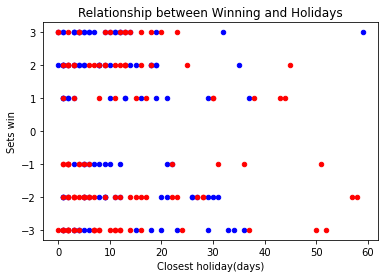

In [29]:
men_result_with_city_df_holidays1 = men_result_with_city_df.plot(kind='scatter', x='home_team_closest_holiday', y='sets_diff', color='blue')
men_result_with_city_df_holidays2 = men_result_with_city_df.plot(kind='scatter', x='away_team_closest_holiday', y='sets_diff_reverse', color='red', title='Relationship between Winning and Holidays', ax=men_result_with_city_df_holidays1)
men_result_with_city_df_holidays2.set_xlabel("Closest holiday(days)")
men_result_with_city_df_holidays2.set_ylabel("Sets win")
plt.show()

Result:

There does not seem to have a pattern between winning and holidays. 

## 3. Find the relationship between travel distance and match performance.

### Data pre-processing:

Import relevant datasets

1. all men's team match results (already imported)
2. coordinates for the match location

In [30]:
#2 coordinates for the match location
geocode_df = pj2.csv_to_df('data/geocode')

Data integration: Merge the two tables

In [31]:
men_result_with_city_geocode_df = pd.merge(men_result_with_city_df, geocode_df, how='left', left_on=[('City', 'Unnamed: 13_level_1')], right_on=['City'])
men_result_with_city_geocode_df

,"(Number, Number)","(Date, Date)","(Teams, Teams)","(Sets, Sets)","(Result per set (points), 1)","(Result per set (points).1, 2)","(Result per set (points).2, 3)","(Result per set (points).3, 4)","(Result per set (points).4, 5)","(Points, Points)",...,value_y,home_team_closest_holiday,away_team_closest_holiday,sets_diff,sets_diff_reverse,City,addresst,City_api,longt,latt
0,1,2019-05-31,IRI - ITA,3 - 1,20 - 25,25 - 23,25 - 23,25 - 23,-,95 - 94,...,italy,NaN,2.0,2,-2,Jiangmen,{},Jiangmen,113.08243,22.59188
1,7,2019-05-31,SRB - JPN,1 - 3,17 - 25,12 - 25,26 - 24,17 - 25,-,72 - 99,...,japan,29.0,25.0,-2,2,Novi Sad,{},Novi Sad,19.82768,45.25344
2,5,2019-05-31,USA - BRA,0 - 3,22 - 25,22 - 25,23 - 25,-,-,67 - 75,...,brazil,4.0,20.0,-3,3,Katowice,{},Katowice,18.99499,50.24148
3,3,2019-05-31,CAN - BUL,1 - 3,20 - 25,24 - 26,25 - 19,17 - 25,-,86 - 95,...,bulgaria,11.0,7.0,-2,2,Mendoza,Ciudad De Mendoza,Mendoza,-68.89916,-32.88097
4,2,2019-05-31,CHN - GER,2 - 3,21 - 25,21 - 25,25 - 19,25 - 19,11 - 15,103 - 103,...,germany,7.0,1.0,-1,1,Jiangmen,{},Jiangmen,113.08243,22.59188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,2019-06-30,CAN - FRA,0 - 3,22 - 25,26 - 28,23 - 25,-,-,71 - 78,...,france,1.0,14.0,-3,3,Brasilia,{},Brasilia,-47.97349,-15.81962
116,117,2019-06-30,IRI - USA,0 - 3,25 - 27,21 - 25,20 - 25,-,-,66 - 77,...,usa,NaN,4.0,-3,3,Plovdiv,Пловдив,Plovdiv,24.69771,42.09620
117,120,2019-06-30,POL - POR,3 - 0,25 - 18,25 - 21,25 - 20,-,-,75 - 59,...,portugal,10.0,1.0,3,-3,Leipzig,{},Leipzig,12.37691,51.33993
118,116,2019-06-30,BRA - ITA,3 - 1,26 - 28,25 - 22,25 - 18,25 - 18,-,101 - 86,...,italy,10.0,28.0,2,-2,Brasilia,{},Brasilia,-47.97349,-15.81962


In [32]:
#extract match schedule for every country and save them in a list
def each_country_schedule_df_list(main_df, df_with_country):
    li = list()
    for country in df_with_country['Country'].str[:3].drop_duplicates():
        df = main_df[main_df[('Teams', 'Teams')].str.contains(country.upper())]
        df['Country'] = country.upper()
        li.append(df)
    return li

each_country_schedule = each_country_schedule_df_list(men_result_with_city_geocode_df, team_roster_df)
each_country_schedule[2] #Brail's schedule(inckudes both home team and away team matches)

<ipython-input-32-22d53c29f12a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = country.upper()


,"(Number, Number)","(Date, Date)","(Teams, Teams)","(Sets, Sets)","(Result per set (points), 1)","(Result per set (points).1, 2)","(Result per set (points).2, 3)","(Result per set (points).3, 4)","(Result per set (points).4, 5)","(Points, Points)",...,home_team_closest_holiday,away_team_closest_holiday,sets_diff,sets_diff_reverse,City,addresst,City_api,longt,latt,Country
2,5,2019-05-31,USA - BRA,0 - 3,22 - 25,22 - 25,23 - 25,-,-,67 - 75,...,4.0,20.0,-3,3,Katowice,{},Katowice,18.99499,50.24148,BRA
8,13,2019-06-01,BRA - AUS,3 - 2,32 - 34,25 - 16,25 - 19,27 - 29,15 - 13,124 - 111,...,19.0,2.0,1,-1,Katowice,{},Katowice,18.99499,50.24148,BRA
20,22,2019-06-02,BRA - POL,3 - 1,22 - 25,25 - 15,25 - 21,25 - 17,-,97 - 78,...,18.0,7.0,2,-2,Katowice,{},Katowice,18.99499,50.24148,BRA
24,29,2019-06-07,BRA - IRI,3 - 2,23 - 25,25 - 16,21 - 25,33 - 31,15 - 10,117 - 107,...,13.0,NaN,1,-1,Tokyo,{},Tokyo,139.68875,35.68046,BRA
36,38,2019-06-08,JPN - BRA,0 - 3,22 - 25,19 - 25,21 - 25,-,-,62 - 75,...,33.0,12.0,-3,3,Tokyo,{},Tokyo,139.68875,35.68046,BRA
41,45,2019-06-09,ARG - BRA,2 - 3,20 - 25,25 - 21,28 - 26,23 - 25,12 - 15,108 - 112,...,8.0,11.0,-1,1,Tokyo,{},Tokyo,139.68875,35.68046,BRA
51,49,2019-06-14,BRA - SRB,2 - 3,25 - 17,22 - 25,25 - 17,20 - 25,12 - 15,104 - 99,...,6.0,43.0,-1,1,Gondomar,{},Gondomar,-8.53312,41.13974,BRA
57,57,2019-06-15,BRA - CHN,3 - 0,25 - 15,25 - 18,25 - 22,-,-,75 - 55,...,5.0,8.0,3,-3,Gondomar,{},Gondomar,-8.53312,41.13974,BRA
69,66,2019-06-16,POR - BRA,0 - 3,19 - 25,21 - 25,18 - 25,-,-,58 - 75,...,4.0,4.0,-3,3,Gondomar,{},Gondomar,-8.53312,41.13974,BRA
77,80,2019-06-21,BRA - BUL,3 - 1,25 - 20,21 - 25,25 - 19,25 - 14,-,96 - 78,...,1.0,28.0,2,-2,Cuiaba,{},Cuiaba,-56.06095,-15.60085,BRA


In [33]:
# calculate the number of wins/losses for each country
def team_win_loss(main_df):
    li = list()
    for country_df in main_df:
        #calculate the country's number of wins/losses as a home team
        df_home = country_df[country_df['Country'] == country_df[('Teams', 'Teams')].str[:3]] 
        df_home['net_win'] = -1 #-1 represent a loss
        df_home.loc[df_home['sets_diff'] > 0, 'net_win'] = 1 #1 represent a win
        
        #calculate the country's number of wins/losses as a home team
        df_away = country_df[country_df['Country'] == country_df[('Teams', 'Teams')].str[-3:]]
        df_away['net_win'] = -1
        df_away.loc[df_away['sets_diff_reverse'] > 0, 'net_win'] = 1
        
        #combine all home and away game results
        df_recombined = pd.concat([df_home, df_away])
        df_recombined = df_recombined.sort_values(by=[('Date', 'Date')])
        li.append(df_recombined)
    return li


each_country_schedule_win_loss = team_win_loss(each_country_schedule)
each_country_schedule_win_loss[1] #Australia

<ipython-input-33-a69185c73742>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home['net_win'] = -1 #-1 represent a loss
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-33-a69185c73742>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,"(Number, Number)","(Date, Date)","(Teams, Teams)","(Sets, Sets)","(Result per set (points), 1)","(Result per set (points).1, 2)","(Result per set (points).2, 3)","(Result per set (points).3, 4)","(Result per set (points).4, 5)","(Points, Points)",...,away_team_closest_holiday,sets_diff,sets_diff_reverse,City,addresst,City_api,longt,latt,Country,net_win
6,6,2019-05-31,POL - AUS,3 - 1,25 - 15,24 - 26,25 - 21,25 - 14,-,99 - 76,...,3.0,2,-2,Katowice,{},Katowice,18.99499,50.24148,AUS,-1
8,13,2019-06-01,BRA - AUS,3 - 2,32 - 34,25 - 16,25 - 19,27 - 29,15 - 13,124 - 111,...,2.0,1,-1,Katowice,{},Katowice,18.99499,50.24148,AUS,-1
16,21,2019-06-02,AUS - USA,1 - 3,25 - 19,25 - 27,16 - 25,16 - 25,-,82 - 96,...,6.0,-2,2,Katowice,{},Katowice,18.99499,50.24148,AUS,-1
31,32,2019-06-07,CAN - AUS,3 - 0,25 - 23,25 - 17,25 - 18,-,-,75 - 58,...,3.0,3,-3,Ottawa,{},Ottawa,-75.70531,45.35917,AUS,-1
35,39,2019-06-08,SRB - AUS,3 - 2,22 - 25,14 - 25,25 - 21,25 - 21,15 - 9,101 - 101,...,2.0,1,-1,Ottawa,{},Ottawa,-75.70531,45.35917,AUS,-1
40,47,2019-06-09,AUS - GER,3 - 0,25 - 20,25 - 20,25 - 16,-,-,75 - 56,...,1.0,3,-3,Ottawa,{},Ottawa,-75.70531,45.35917,AUS,1
54,52,2019-06-14,BUL - AUS,3 - 2,20 - 25,29 - 27,22 - 25,25 - 21,15 - 13,111 - 111,...,4.0,1,-1,Varna,Varna,Варна,27.90171,43.21661,AUS,-1
59,59,2019-06-15,AUS - ITA,1 - 3,18 - 25,32 - 30,18 - 25,15 - 25,-,83 - 105,...,13.0,-2,2,Varna,Varna,Варна,27.90171,43.21661,AUS,-1
67,67,2019-06-16,JPN - AUS,3 - 2,25 - 18,25 - 27,23 - 25,25 - 22,17 - 15,115 - 107,...,6.0,1,-1,Varna,Varna,Варна,27.90171,43.21661,AUS,-1
72,77,2019-06-21,FRA - AUS,3 - 0,25 - 23,25 - 22,25 - 22,-,-,75 - 67,...,11.0,3,-3,Ardabil,{},Ardabil,48.29131,38.24353,AUS,-1


In [34]:
#calculate the net wins for each country in each match location
#each team plays 3 matches in one location
#if the net win is 1, it means the team has won 2 matches and has lost 1 match.
def net_win(each_country_schedule_win_loss):
    li = list()
    for country_df in each_country_schedule_win_loss:
        net_win_count_df = country_df.groupby(['City'])['net_win'].sum().reset_index()
        df = pd.merge(country_df, net_win_count_df, how='left', left_on=['City'], right_on=['City'])
        df = df.rename(columns={"net_win_x": "net_win", "net_win_y": "net_win_count"})
        li.append(df)
    return li


net_win_df_list = net_win(each_country_schedule_win_loss)
net_win_df_list[8] #Iran

,"(Number, Number)","(Date, Date)","(Teams, Teams)","(Sets, Sets)","(Result per set (points), 1)","(Result per set (points).1, 2)","(Result per set (points).2, 3)","(Result per set (points).3, 4)","(Result per set (points).4, 5)","(Points, Points)",...,sets_diff,sets_diff_reverse,City,addresst,City_api,longt,latt,Country,net_win,net_win_count
0,1,2019-05-31,IRI - ITA,3 - 1,20 - 25,25 - 23,25 - 23,25 - 23,-,95 - 94,...,2,-2,Jiangmen,{},Jiangmen,113.08243,22.59188,IRI,1,3
1,10,2019-06-01,CHN - IRI,0 - 3,22 - 25,18 - 25,21 - 25,-,-,61 - 75,...,-3,3,Jiangmen,{},Jiangmen,113.08243,22.59188,IRI,1,3
2,17,2019-06-02,GER - IRI,0 - 3,28 - 30,27 - 29,20 - 25,-,-,75 - 84,...,-3,3,Jiangmen,{},Jiangmen,113.08243,22.59188,IRI,1,3
3,29,2019-06-07,BRA - IRI,3 - 2,23 - 25,25 - 16,21 - 25,33 - 31,15 - 10,117 - 107,...,1,-1,Tokyo,{},Tokyo,139.68875,35.68046,IRI,-1,1
4,37,2019-06-08,ARG - IRI,1 - 3,19 - 25,25 - 20,22 - 25,32 - 34,-,98 - 104,...,-2,2,Tokyo,{},Tokyo,139.68875,35.68046,IRI,1,1
5,46,2019-06-09,JPN - IRI,0 - 3,22 - 25,21 - 25,19 - 25,-,-,62 - 75,...,-3,3,Tokyo,{},Tokyo,139.68875,35.68046,IRI,1,1
6,54,2019-06-14,IRI - CAN,3 - 0,25 - 15,26 - 24,25 - 16,-,-,76 - 55,...,3,-3,Urmia,{},Urmia,23.20589,61.48912,IRI,1,3
7,62,2019-06-15,IRI - POL,3 - 2,25 - 20,21 - 25,18 - 25,25 - 17,15 - 8,104 - 95,...,1,-1,Urmia,{},Urmia,23.20589,61.48912,IRI,1,3
8,70,2019-06-16,IRI - RUS,3 - 0,25 - 20,26 - 24,25 - 23,-,-,76 - 67,...,3,-3,Urmia,{},Urmia,23.20589,61.48912,IRI,1,3
9,78,2019-06-21,IRI - POR,3 - 1,23 - 25,27 - 25,25 - 17,25 - 18,-,100 - 85,...,2,-2,Ardabil,{},Ardabil,48.29131,38.24353,IRI,1,1


In [35]:
#define a function to get distance between 2 coordinates for counting the travel distance between matches
#same function from the lab
def get_distance(point1, point2):
    # approximate radius of earth in km
    R = 6373.0
    lat1 = radians(point1[0])
    lon1 = radians(point1[1])
    lat2 = radians(point2[0])
    lon2 = radians(point2[1])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [36]:
#combine the lattitude and longitude columns into one column of tuple, 
#so it may be plugged into the get_distance function

#also, add a column with coordinates which prepresent the team's previuos match location
#column 'latt_longt' acts as point1 in the get_distance() function
#while column 'prev_latt_longt' acts as point2 

#no need to add previous match location for the first match location
def add_prev_latt_longt(net_win_df_list):
    li = list()
    for country_df in net_win_df_list:
        df = country_df[['Country', 'City', 'net_win_count', 'latt', 'longt']].drop_duplicates().reset_index()
        df['latt_longt'] = list(zip(df.latt, df.longt))
        df['prev_latt_longt'] = df.latt_longt.shift(1)
        #new_df = pd.merge(country_df, df, how='left', left_on=['City'], right_on=['City'])
        li.append(df)
    return li
    
net_win_latt_longt_df_list = add_prev_latt_longt(net_win_df_list)
net_win_latt_longt_df_list[0]#Argentina
    #get_distance(point1, point2)

,index,Country,City,net_win_count,latt,longt,latt_longt,prev_latt_longt
0,0,ARG,Mendoza,1,-32.88097,-68.89916,"(-32.88097, -68.89916)",NaN
1,3,ARG,Tokyo,-3,35.68046,139.68875,"(35.68046, 139.68875)","(-32.88097, -68.89916)"
2,6,ARG,Cannes,1,43.55425,7.02025,"(43.55425, 7.02025)","(35.68046, 139.68875)"
3,9,ARG,Milano,1,45.47474,9.17984,"(45.474740000000004, 9.179839999999999)","(43.55425, 7.02025)"
4,12,ARG,Brisbane,1,-27.46950,153.02560,"(-27.4695, 153.0256)","(45.474740000000004, 9.179839999999999)"


In [37]:
#calculate the distance traveled between match locations for each country
def add_distance_traveled(net_win_latt_longt_df_list):
    li = list()
    for country_df in net_win_latt_longt_df_list:
        country_df['distance_traveled'] = 0
        for i in range(len(country_df)):
            if i!=0:
                country_df.at[i, 'distance_traveled'] = get_distance(country_df.at[i, 'latt_longt'], country_df.at[i, 'prev_latt_longt'])
        li.append(country_df)
    return li

net_win_latt_longt_distance_traveled_df_list = add_distance_traveled(net_win_latt_longt_df_list)
net_win_latt_longt_distance_traveled_df_list[4]#Canada

,index,Country,City,net_win_count,latt,longt,latt_longt,prev_latt_longt,distance_traveled
0,0,CAN,Mendoza,1,-32.88097,-68.89916,"(-32.88097, -68.89916)",NaN,0
1,3,CAN,Ottawa,1,45.35917,-75.70531,"(45.35917, -75.70531)","(-32.88097, -68.89916)",8729
2,6,CAN,Urmia,-3,61.48912,23.20589,"(61.48911999999999, 23.20589)","(45.35917, -75.70531)",6119
3,9,CAN,Hoffman Estates,3,42.06565,-88.12115,"(42.06565, -88.12115)","(61.48911999999999, 23.20589)",6965
4,12,CAN,Brasilia,-1,-15.81962,-47.97349,"(-15.81962, -47.973490000000005)","(42.06565, -88.12115)",7640


In [38]:
#combine all country's df into one
net_win_latt_longt_distance_traveled_df = pd.concat(net_win_latt_longt_distance_traveled_df_list)
net_win_latt_longt_distance_traveled_df

,index,Country,City,net_win_count,latt,longt,latt_longt,prev_latt_longt,distance_traveled
0,0,ARG,Mendoza,1,-32.88097,-68.89916,"(-32.88097, -68.89916)",NaN,0
1,3,ARG,Tokyo,-3,35.68046,139.68875,"(35.68046, 139.68875)","(-32.88097, -68.89916)",17384
2,6,ARG,Cannes,1,43.55425,7.02025,"(43.55425, 7.02025)","(35.68046, 139.68875)",9992
3,9,ARG,Milano,1,45.47474,9.17984,"(45.474740000000004, 9.179839999999999)","(43.55425, 7.02025)",273
4,12,ARG,Brisbane,1,-27.46950,153.02560,"(-27.4695, 153.0256)","(45.474740000000004, 9.179839999999999)",16264
...,...,...,...,...,...,...,...,...,...
0,0,USA,Katowice,-1,50.24148,18.99499,"(50.241479999999996, 18.994989999999998)",NaN,0
1,3,USA,Ufa,-1,54.55750,55.87440,"(54.5575, 55.8744)","(50.241479999999996, 18.994989999999998)",2518
2,6,USA,Cannes,3,43.55425,7.02025,"(43.55425, 7.02025)","(54.5575, 55.8744)",3679
3,9,USA,Hoffman Estates,1,42.06565,-88.12115,"(42.06565, -88.12115)","(43.55425, 7.02025)",7294


### Data analysis: Visualization 

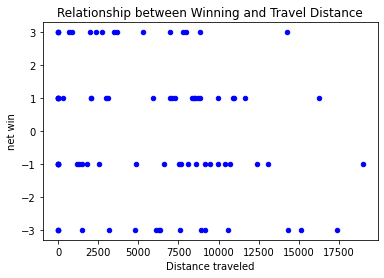

In [39]:
net_win_latt_longt_distance_traveled_plot = net_win_latt_longt_distance_traveled_df.plot(kind='scatter', x='distance_traveled', y='net_win_count', color='blue', title='Relationship between Winning and Travel Distance')
net_win_latt_longt_distance_traveled_plot.set_xlabel("Distance traveled")
net_win_latt_longt_distance_traveled_plot.set_ylabel("net win")
plt.show()

Results:

There does not seem to have an obvious relationship between winning and travel distance. However, we could observe that there are more net wins of 3 than net wins of -3 at low travel distance. Meanwhile, there are more net wins of -3 than net wins of 3 at high travel distance. This might indicate that the higher the travel distance, the worse the match performance.